In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve

# 2. Data Preprocessing and Exploratory Data Analysis

## Task 1: Understanding the Dataset

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256 entries, 0 to 6255
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6256 non-null   int64  
 1   Address         6256 non-null   object 
 2   Possesion       6256 non-null   object 
 3   Furnishing      6256 non-null   object 
 4   Buildup_area    6256 non-null   int64  
 5   Carpet_area     6256 non-null   float64
 6   Bathrooms       6256 non-null   float64
 7   Property_age    6256 non-null   int64  
 8   Parking         6256 non-null   int64  
 9   Price           6256 non-null   int64  
 10  Brokerage       6256 non-null   float64
 11  Floor           6256 non-null   float64
 12  Per_sqft_price  6256 non-null   float64
 13  BHK             6256 non-null   float64
 14  Total_bedrooms  6256 non-null   float64
dtypes: float64(7), int64(5), object(3)
memory usage: 733.3+ KB


,index,Address,Possesion,Furnishing,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,6250,"Arihant housing society, Sai Nagar, Kandivali ...",Ready to move,Semi Furnished,615,508.043150,1.0,12,0,14500000,14500000.0,7.0,23580.0,2.0,2.0
1,6523,"5 year tower, I C Colony, Borivali West, Mumbai",Ready to move,Semi Furnished,1200,724.772558,3.0,5,1,18500000,18500000.0,13.0,15420.0,2.0,2.0
2,4286,"Windsor Grande Residences, Mhada Colony, Andhe...",Ready to move,Semi Furnished,3300,2300.000000,5.0,6,3,125000000,1250000.0,32.0,37880.0,4.0,4.0
3,5038,"Maharashtra Nagar, Borivali West, Mumbai",Ready to move,Unfurnished,800,642.570682,1.0,25,1,16000000,16000000.0,4.0,20000.0,2.0,2.0
4,8491,"Bandra West, Mumbai",Ready to move,Semi Furnished,2000,1602.321210,4.0,10,2,85000000,85000000.0,12.0,42500.0,3.0,3.0


In [3]:
print("\nNumber of Values in Each Feature:")
i = 1
for col in train_df.columns:
    print(f"Feature {i} {col}: {train_df[col].nunique()} unique values")
    i+=1


Number of Values in Each Feature:
Feature 1 index: 6256 unique values
Feature 2 Address: 3223 unique values
Feature 3 Possesion: 1 unique values
Feature 4 Furnishing: 3 unique values
Feature 5 Buildup_area: 944 unique values
Feature 6 Carpet_area: 2520 unique values
Feature 7 Bathrooms: 85 unique values
Feature 8 Property_age: 46 unique values
Feature 9 Parking: 10 unique values
Feature 10 Price: 755 unique values
Feature 11 Brokerage: 1517 unique values
Feature 12 Floor: 125 unique values
Feature 13 Per_sqft_price: 2501 unique values
Feature 14 BHK: 9 unique values
Feature 15 Total_bedrooms: 27 unique values


In [4]:
numerical_features = train_df.select_dtypes(include=["int64", "float64"]).columns
print("\nStatistical information about numerical features")
s = train_df[numerical_features].describe(percentiles=[0.25, 0.5, 0.75])
print(s)


Statistical information about numerical features
             index  Buildup_area   Carpet_area    Bathrooms  Property_age  \
count  6256.000000   6256.000000   6256.000000  6256.000000   6256.000000   
mean   4879.818894   1120.690537    864.869801     1.968057      7.519661   
std    2770.439333    735.147038    583.283918     0.911779      7.374092   
min       1.000000    180.000000    150.000000     1.000000      1.000000   
25%    2494.750000    650.000000    475.000000     1.000000      2.000000   
50%    4920.500000    950.000000    708.315583     2.000000      5.000000   
75%    7276.250000   1325.000000   1050.000000     2.000000     10.000000   
max    9546.000000  15000.000000  14000.000000    10.000000     99.000000   

           Parking         Price     Brokerage        Floor  Per_sqft_price  \
count  6256.000000  6.256000e+03  6.256000e+03  6256.000000     6256.000000   
mean      1.298593  3.057852e+07  1.148133e+07    19.885595    23415.351551   
std       0.797501 

## Task 2: Dropping Irrelevant Columns

In [5]:
corr_mat = train_df.select_dtypes(include=["int64", "float64"]).corr()
useless_features = set(corr_mat["Price"][(corr_mat["Price"]>-0.1) & (corr_mat["Price"]<0.1)].index)
useless_features = useless_features.union(("Possesion", "index"))
train_df = train_df.drop(columns=useless_features, axis=1)

print("Features dropped from training dataset")
for feature in useless_features:
    print(feature)

corr_mat = test_df.select_dtypes(include=["int64", "float64"]).corr()
useless_features = set(corr_mat["Price"][(corr_mat["Price"]>-0.1) & (corr_mat["Price"]<0.1)].index)
useless_features = useless_features.union(("Possesion", "index"))
test_df =  test_df.drop(columns=useless_features, axis=1)

print("\nFeatures dropped from testing dataset")
for feature in useless_features:
    print(feature)

Features dropped from training dataset
Possesion
index
Property_age

Features dropped from testing dataset
Possesion
index
Property_age


#### These were columns dropped from the training and testing data, The column index is dropped because index has no relation with the price of property also Possession does not help in any way to predict the price of the property because our ultimate goal is to predict the price of the property with the help of given features. Property_age is dropped because of weak correlation found with the given conditions in the problem statement.

## Task 3: Encoding Categorical Features

In [6]:
encoder = LabelEncoder()
categorical_features = ['Address', 'Furnishing', 'BHK']
for feature in categorical_features:
    if feature == 'Address':
        mpp = train_df[feature].value_counts().to_dict()
        train_df[feature] = train_df[feature].map(mpp)
        test_df[feature] = test_df[feature].map(mpp)
    
    else:
        train_df[feature] = encoder.fit_transform(train_df[feature])
        test_df[feature] = encoder.fit_transform(test_df[feature])
        
train_df.head()

,Address,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,1,1,615,508.043150,1.0,0,14500000,14500000.0,7.0,23580.0,2,2.0
1,1,1,1200,724.772558,3.0,1,18500000,18500000.0,13.0,15420.0,2,2.0
2,5,1,3300,2300.000000,5.0,3,125000000,1250000.0,32.0,37880.0,4,4.0
3,1,2,800,642.570682,1.0,1,16000000,16000000.0,4.0,20000.0,2,2.0
4,26,1,2000,1602.321210,4.0,2,85000000,85000000.0,12.0,42500.0,3,3.0


In [7]:
test_df.head()

,Address,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,NaN,2,987.0,650.000000,2.0,1,15800000,160000.0,18.0,16010.0,2,2.0
1,2.0,1,1525.0,1226.550140,1.0,1,50000000,50000000.0,7.0,32790.0,3,3.0
2,2.0,2,940.0,714.000000,2.0,2,19500000,190000.0,15.0,20740.0,2,2.0
3,2.0,0,750.0,864.305261,2.0,1,29000000,29000000.0,25.0,38670.0,2,2.0
4,2.0,1,1450.0,1107.106682,1.0,1,42000000,42000000.0,7.0,28960.0,3,3.0


In [8]:
test_df.isna().sum()

Address           527
Furnishing          0
Buildup_area        0
Carpet_area         0
Bathrooms           0
Parking             0
Price               0
Brokerage           0
Floor               0
Per_sqft_price      0
BHK                 0
Total_bedrooms      0
dtype: int64

In [9]:
test_df['Address'].fillna(test_df['Address'].median())
test_df.isna().sum()

Address           527
Furnishing          0
Buildup_area        0
Carpet_area         0
Bathrooms           0
Parking             0
Price               0
Brokerage           0
Floor               0
Per_sqft_price      0
BHK                 0
Total_bedrooms      0
dtype: int64

## Task 4: Feature Scaling

In [10]:
scaler = StandardScaler()
numerical_features = ['Buildup_area', 'Carpet_area', 'Bathrooms', 'Parking', 'Price', 'Brokerage', 'Per_sqft_price', 'Total_bedrooms']
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.fit_transform(test_df[numerical_features])

In [11]:
train_df.head()

,Address,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,1,1,-0.687932,-0.611804,-1.061809,-1.628459,-0.424235,0.095406,7.0,0.012601,2,-0.209911
1,1,1,0.107891,-0.240206,1.131881,-0.374441,-0.318695,0.221827,13.0,-0.611908,2,-0.209911
2,5,1,2.964691,2.460628,3.325572,2.133594,2.491333,-0.323364,32.0,1.107023,4,1.819414
3,1,2,-0.436261,-0.381147,-1.061809,-0.374441,-0.384658,0.142814,4.0,-0.261387,2,-0.209911
4,26,1,1.196196,1.264411,2.228726,0.879576,1.435924,2.323578,12.0,1.460605,3,0.804752


In [12]:
test_df.head()

,Address,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,NaN,2,-0.165811,-0.378231,0.004603,-0.406995,-0.404152,-0.369678,18.0,-0.576365,2,-0.185875
1,2.0,1,0.639916,0.706705,-1.166844,-0.406995,0.596435,1.383363,7.0,0.741774,3,0.859971
2,2.0,2,-0.236200,-0.257797,0.004603,0.850989,-0.295901,-0.368623,15.0,-0.204804,2,-0.185875
3,2.0,0,-0.520750,0.025043,0.004603,-0.406995,-0.017960,0.644722,25.0,1.203673,2,-0.185875
4,2.0,1,0.527593,0.481940,-1.166844,-0.406995,0.362379,1.101976,7.0,0.440912,3,0.859971


## Task 5: Target Variable Imbalance Detection

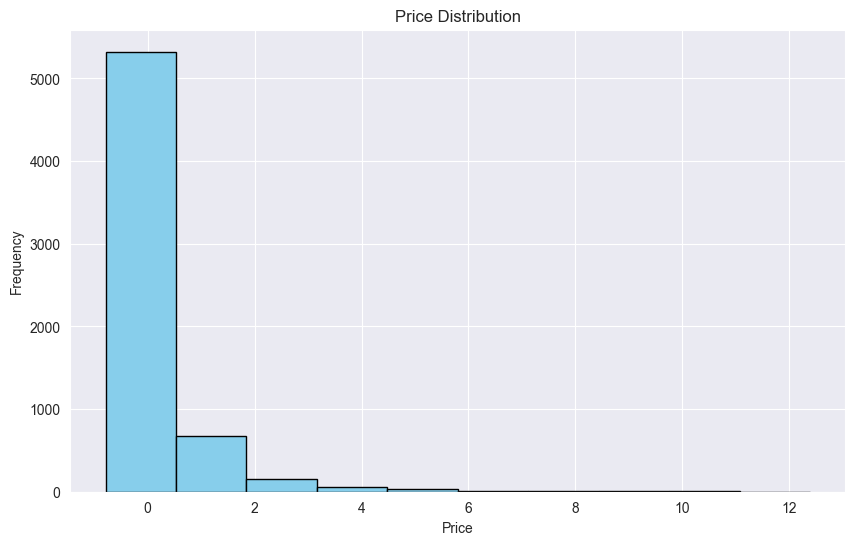

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [14]:
bins = [train_df['Price'].min(), 
              train_df['Price'].quantile(0.25),
              train_df['Price'].quantile(0.50),
              train_df['Price'].quantile(0.75),
              train_df['Price'].max()]

bins2 = [test_df['Price'].min(),
              test_df['Price'].quantile(0.25),
              test_df['Price'].quantile(0.50),
              test_df['Price'].quantile(0.75),
              test_df['Price'].max()]  

labels = ['Low', 'Medium', 'High', 'Very High']

train_df['Price_Category'] = pd.cut(train_df['Price'], bins=bins, labels=labels, include_lowest=True)
test_df['Price_Category'] = pd.cut(test_df['Price'], bins=bins2, labels=labels, include_lowest=True)

In [15]:
counts = train_df['Price_Category'].value_counts()
counts

Price_Category
High         1599
Low          1567
Medium       1566
Very High    1524
Name: count, dtype: int64

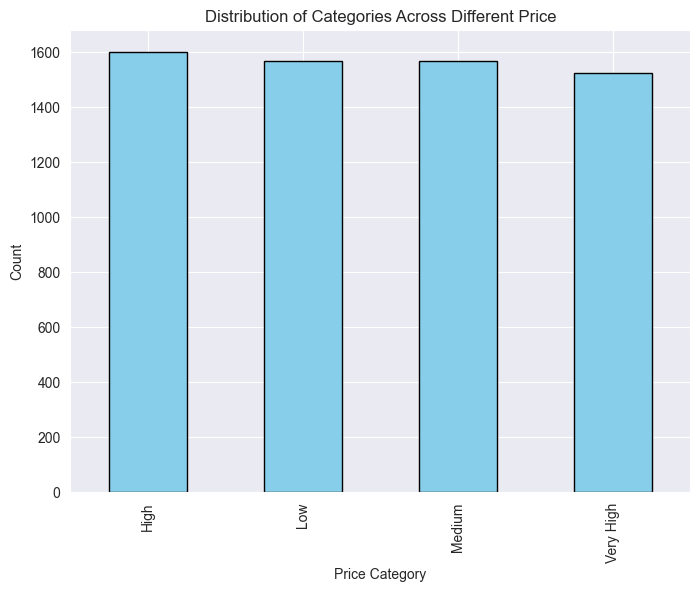

In [16]:
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Categories Across Different Price')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

(f)

In [17]:
train_df.columns

Index(['Address', 'Furnishing', 'Buildup_area', 'Carpet_area', 'Bathrooms',
       'Parking', 'Price', 'Brokerage', 'Floor', 'Per_sqft_price', 'BHK',
       'Total_bedrooms', 'Price_Category'],
      dtype='object')

## Task 6: Handling Imbalance Data

In [18]:
X_train = train_df.drop(columns=['Price', 'Price_Category'])
y_train = train_df['Price_Category']

X_test = test_df.drop(columns=['Price', 'Price_Category'])
y_test = test_df['Price_Category']

In [19]:
over_sampler = RandomOverSampler(random_state=42)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)
X_test, y_test = over_sampler.fit_resample(X_test, y_test)
y_train.value_counts()

Price_Category
Low          1599
Medium       1599
High         1599
Very High    1599
Name: count, dtype: int64

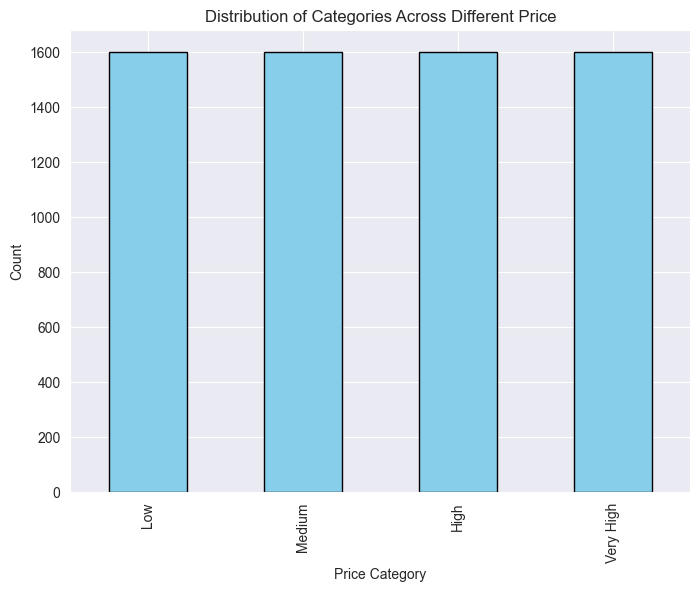

In [20]:
plt.figure(figsize=(8, 6))
y_train.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Categories Across Different Price')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

In [21]:
y_test.value_counts()

Price_Category
Low          393
Medium       393
High         393
Very High    393
Name: count, dtype: int64

In [22]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
print(y_train)
print(y_test)

[2 2 3 ... 3 3 3]
[2 3 0 ... 2 3 3]


# 3. Building Decision Tree Model

## Task 1: Model Training

In [ ]:
model = DecisionTreeRegressor(random_state=42)  
model.fit(X_train, y_train)

plt.figure(figsize=(30, 25))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

In [80]:
print(f"Depth: {model.get_depth()}")
print(f"Leaves: {model.get_n_leaves()}")

Depth: 22
Leaves: 283


## Task 2: Feature Importance and Hyperparameter Tuning

C:\Users\devch\AppData\Local\Temp\ipykernel_17232\3739188559.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')


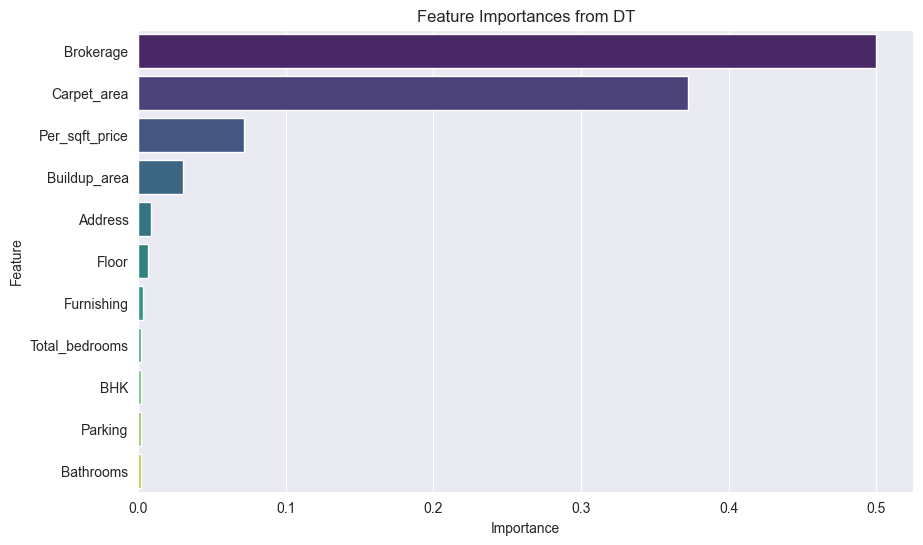

In [82]:
imp = model.feature_importances_
features = X_train.columns

imp_df = pd.DataFrame({'Feature': X_train.columns,'Importance': imp}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')
plt.title('Feature Importances from DT')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [120]:
params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

tuner = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
tuner.fit(X_train, y_train)

best_params = tuner.best_params_
best_score = tuner.best_score_
best_model = tuner.best_estimator_

print("Best Hyper Parameters:", best_params)
print(f"Best Score: {best_score:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyper Parameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.8606


In [110]:
y_pred = model.predict(X_test)
y_pred_tuned = best_model.predict(X_test)

In [111]:
r2_default = r2_score(y_test, y_pred)
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_default = mean_squared_error(y_test, y_pred)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print("Default Model R²:", r2_default)
print("Tuned Model R²:", r2_tuned)
print("Default Model MSE:", mse_default)
print("Tuned Model MSE:", mse_tuned)
print("Best Parameters:", best_params)

Default Model R²: 0.5648854961832062
Tuned Model R²: 0.39808330424338245
Default Model MSE: 0.5438931297709924
Tuned Model MSE: 0.752395869695772
Best Parameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


## Task 3: Pruning Decision Tree

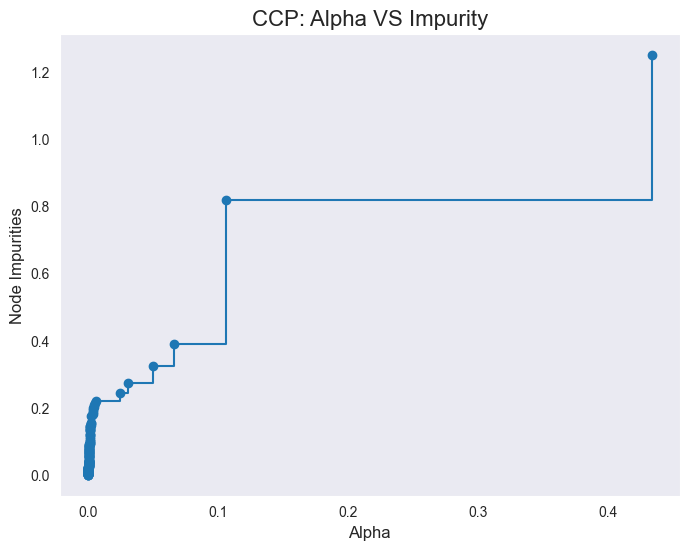

In [185]:
path = model.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas 
impurities = path.impurities 

plt.figure(figsize=(8, 6))
plt.plot(alphas, impurities, marker='o', drawstyle="steps-post")
plt.title("CCP: Alpha VS Impurity", fontsize=16)
plt.xlabel("Alpha", fontsize=12)
plt.ylabel("Node Impurities", fontsize=12)
plt.grid()
plt.show()

In [162]:
trees = []
scores = []

for alpha in alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    score = cross_val_score(tree, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
    trees.append(tree)
    v = np.mean(-score)
    scores.append(v)

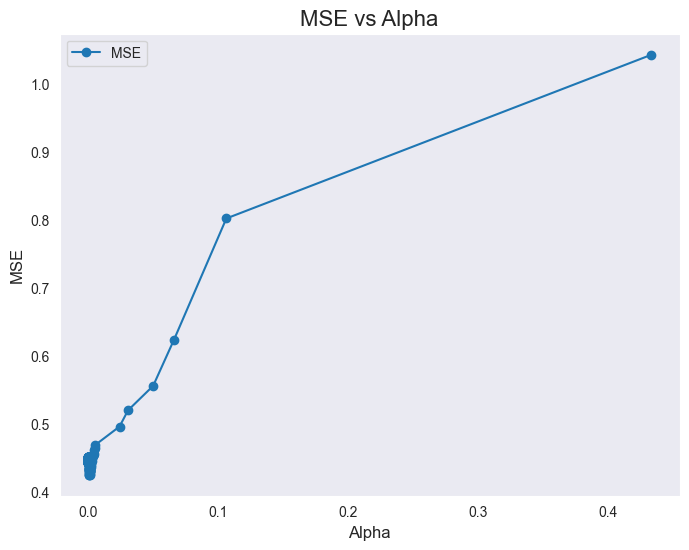

In [164]:
plt.figure(figsize=(8, 6))
plt.plot(alphas, scores, marker='o', label="MSE")
plt.xlabel("Alpha", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("MSE vs Alpha", fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [165]:
alpha = alphas[scores.index(min(scores))]
print(f"Optimal alpha for pruning: {alpha}")

pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
pruned_model.fit(X_train, y_train)

Optimal alpha for pruning: 0.0012195121951219514


DecisionTreeRegressor(ccp_alpha=np.float64(0.0012195121951219514),
                      random_state=42)

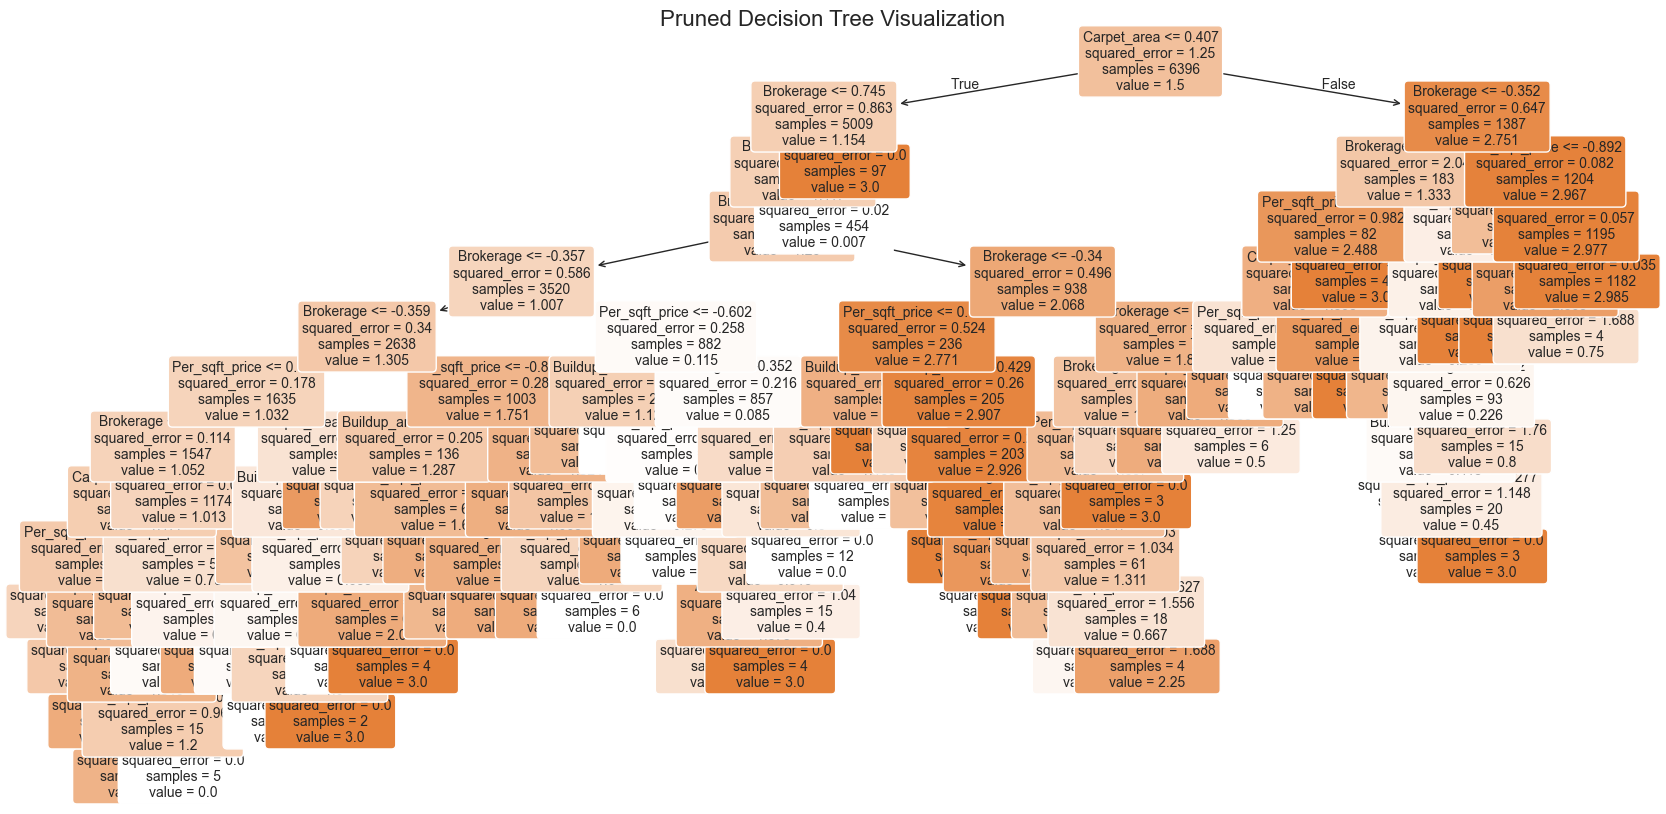

In [166]:
plt.figure(figsize=(20, 10))
plot_tree(pruned_model, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Pruned Decision Tree Visualization", fontsize=16)
plt.show()

In [172]:
print(f"Unpruned Tree Depth: {model.get_depth()}")
print(f"Unpruned Tree Leaves: {model.get_n_leaves()}")
print(f"Pruned Tree Depth: {pruned_model.get_depth()}")
print(f"Pruned Tree Leaves: {pruned_model.get_n_leaves()}")

Unpruned Tree Depth: 22
Unpruned Tree Leaves: 283
Pruned Tree Depth: 13
Pruned Tree Leaves: 68


## Task 4: Handling Overfitting

In [173]:
print("Default Model")
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores)**0.5

print("CV RMSE Scores:", cv_rmse)
print("Mean RMSE :", cv_rmse.mean())
print("St. dev RMSE:", cv_rmse.std())

print("\nPruned Model")
cv_scores = cross_val_score(pruned_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores) ** 0.5

print("CV RMSE Scores:", cv_rmse)
print("Mean RMSE :", cv_rmse.mean())
print("St. dev RMSE:", cv_rmse.std())


Default Model
CV RMSE Scores: [0.45069391 0.50795086 0.4712202  0.42955693 0.39642657]
Mean RMSE : 0.4511696932139329
St. dev RMSE: 0.037657059540286204

Pruned Model
CV RMSE Scores: [0.42560575 0.46343851 0.42898833 0.3961717  0.41276686]
Mean RMSE : 0.4253942298047629
St. dev RMSE: 0.02224291465057214


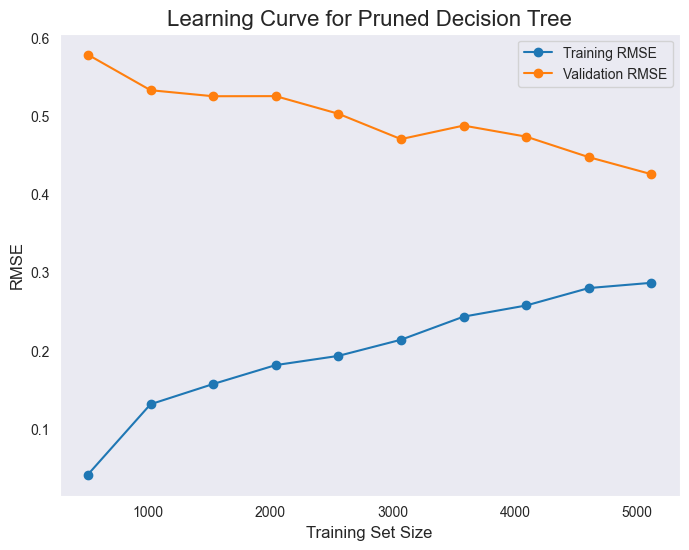

In [169]:
train_sizes, train_scores, val_scores = learning_curve(pruned_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_rmse = np.sqrt(-train_scores).mean(axis=1)
val_rmse = np.sqrt(-val_scores).mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE', marker='o')
plt.plot(train_sizes, val_rmse, label='Validation RMSE', marker='o')
plt.title('Learning Curve for Pruned Decision Tree', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend()
plt.grid()
plt.show()


# 4. Model Evaluation and Error Analysis

## Task 1: Model Evaluation

In [178]:
train_pred = best_model.predict(X_train) 
test_pred = best_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Model Performance Metrics:")
print(f"Training MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Training MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
print(f"Training R²: {train_r2:.2f}, Test R²: {test_r2:.2f}")


Model Performance Metrics:
Training MSE: 0.06, Test MSE: 0.75
Training MAE: 0.06, Test MAE: 0.36
Training R²: 0.95, Test R²: 0.40


## Task 2: Residual and Error Analysis

In [180]:
train_residuals = y_train-train_pred
test_residuals = y_test-test_pred

print("Residual Summary:")
print(f"Training Residual Mean: {train_residuals.mean()}")
print(f"Test Residual Mean: {test_residuals.mean()}")

Residual Summary:
Training Residual Mean: -6.110045413822e-18
Test Residual Mean: 0.07002075003029201


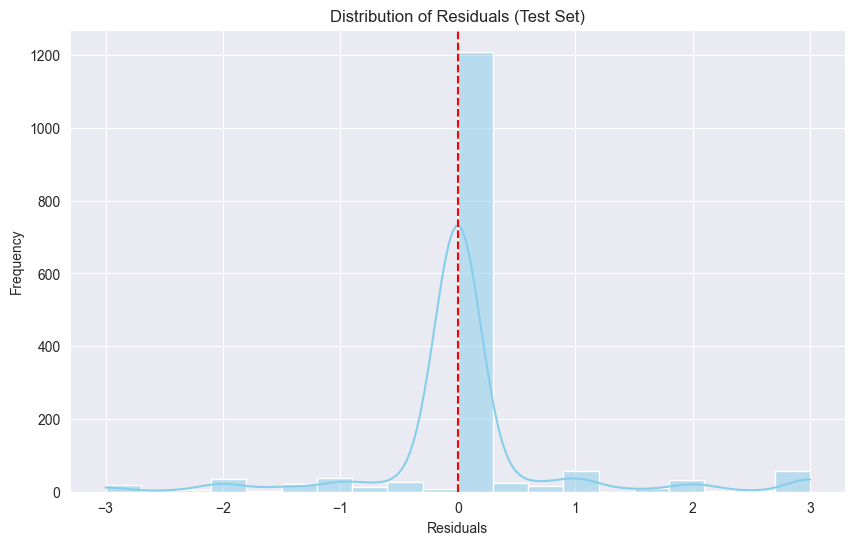

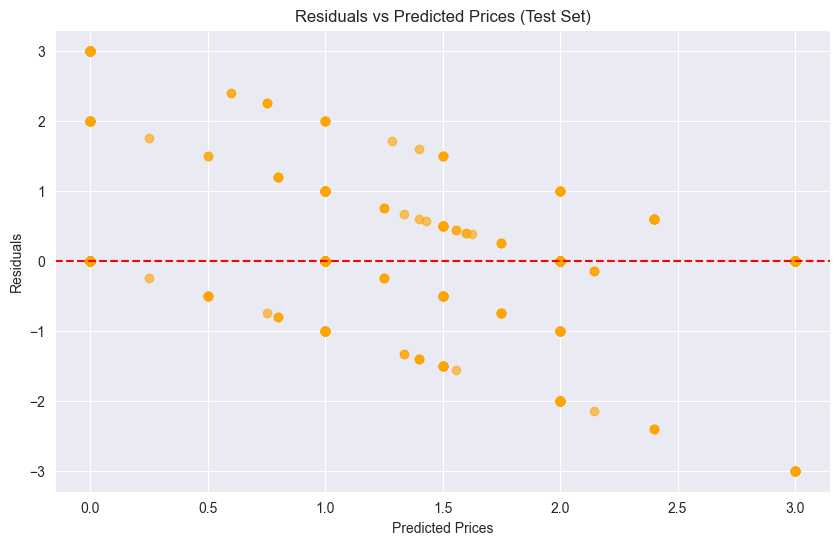

In [181]:
plt.figure(figsize=(10, 6))
sns.histplot(test_residuals, kde=True, bins=20, color='skyblue')
plt.title("Distribution of Residuals (Test Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color="red", linestyle="--")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(test_pred, test_residuals, alpha=0.6, color='orange')
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted Prices (Test Set)")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

## Task 3: Feature Importance Based Analysis

D:\Users\devch\Documents\AI-SEM5\AI_Assignment_04\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Feature: Brokerage, RMSE: 1.09


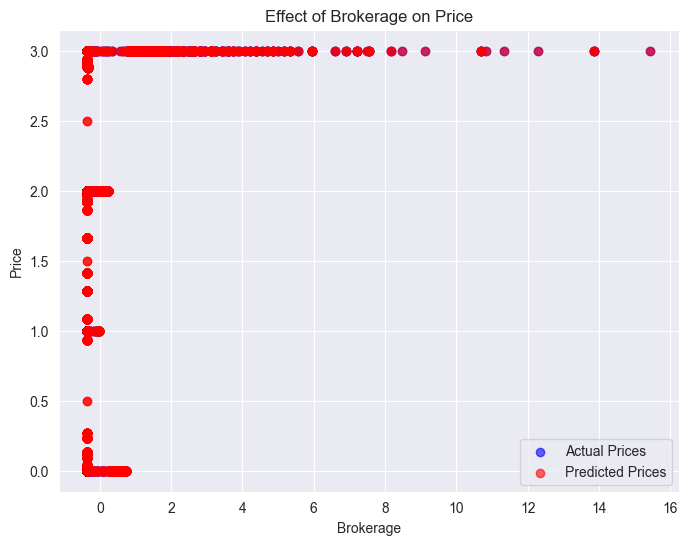

D:\Users\devch\Documents\AI-SEM5\AI_Assignment_04\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Feature: Carpet_area, RMSE: 1.11


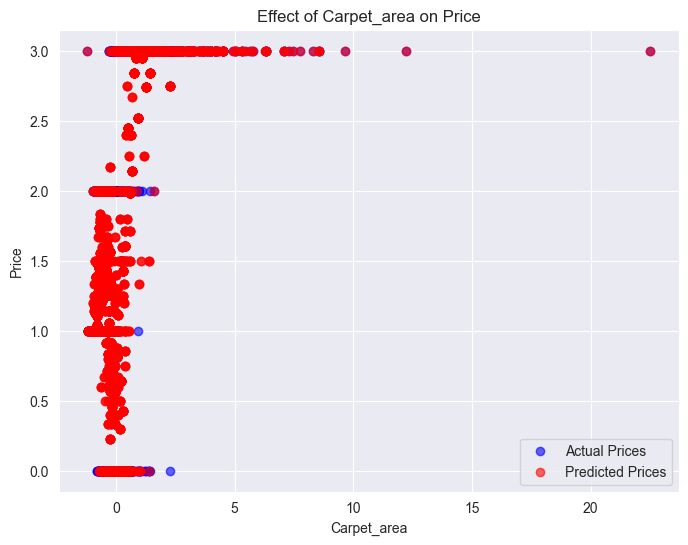

D:\Users\devch\Documents\AI-SEM5\AI_Assignment_04\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Feature: Per_sqft_price, RMSE: 1.27


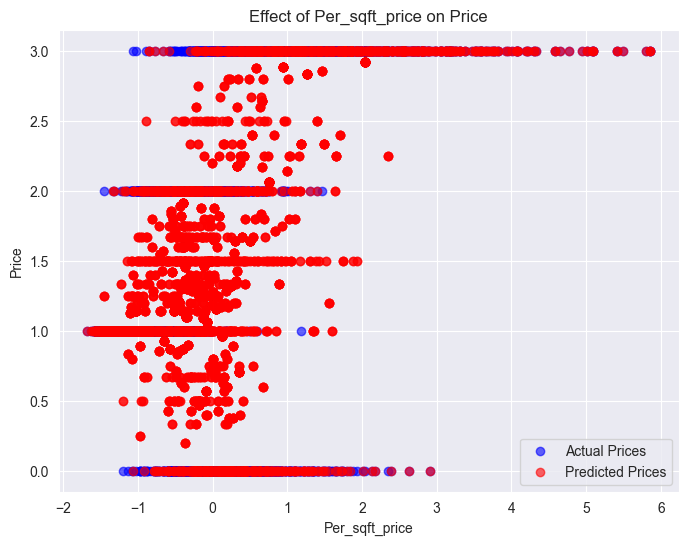

In [184]:
best_features = ['Brokerage', 'Carpet_area', 'Per_sqft_price']

for feature in best_features:
    train_X = X_train[[feature]]
    tree = DecisionTreeRegressor(random_state=42)
    tree.fit(train_X, y_train)

    test_X = X_test[[feature]]
    pred = tree.predict(test_X)

    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"Feature: {feature}, RMSE: {rmse:.2f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[feature], y_train, alpha=0.6, label="Actual Prices", color='blue')
    plt.scatter(X_train[feature], tree.predict(train_X), alpha=0.6, label="Predicted Prices", color='red')
    plt.title(f"Effect of {feature} on Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()
